In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy = True

from sklearn.preprocessing import LabelEncoder

In [70]:
df = pd.read_csv("../dataset/titanic_original.csv")

In [71]:
df.shape

(891, 12)

In [72]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
df.columns = df.columns.str.lower()

In [74]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [75]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [76]:
age = df['age']

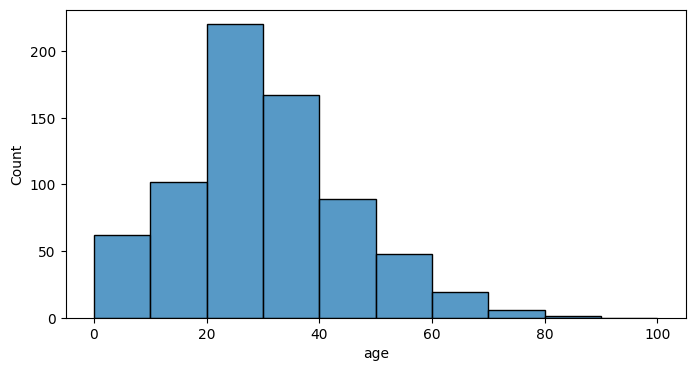

In [77]:
plt.figure(figsize=(8,4))
sns.histplot(data=age, bins=range(0, 101, 10))
plt.show()

In [78]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
df.describe(include="all")

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [81]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [82]:
df["survived"].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

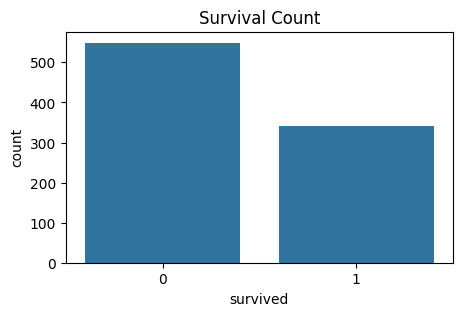

In [83]:
plt.figure(figsize=(5,3))
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.show()

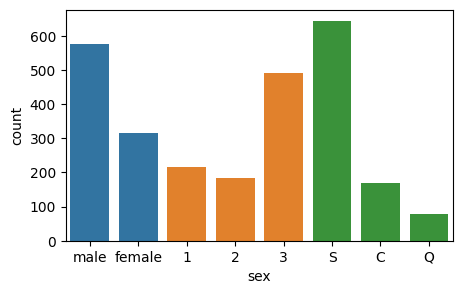

In [84]:
# Categorical features
plt.figure(figsize=(5,3))
sns.countplot(x="sex", data=df)
sns.countplot(x="pclass", data=df)
sns.countplot(x="embarked", data=df)
plt.show()

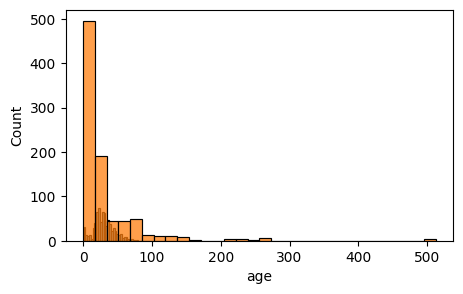

In [85]:
# Numerical features
plt.figure(figsize=(5,3))
sns.histplot(df["age"].dropna(), bins=30)
sns.histplot(df["fare"], bins=30)
plt.show()

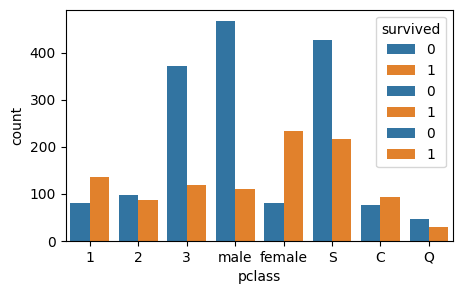

In [86]:
# Survival vs categorical
plt.figure(figsize=(5,3))
sns.countplot(x="pclass", hue="survived", data=df)
sns.countplot(x="sex", hue="survived", data=df)
sns.countplot(x="embarked", hue="survived", data=df)
plt.show()

In [87]:
# Extract title
df["title"] = df["name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [88]:
# Replace rare titles
df["title"] = df["title"].replace(['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df["title"] = df["title"].replace('Mlle', 'Miss')
df["title"] = df["title"].replace('Ms', 'Miss')
df["title"] = df["title"].replace('Mme', 'Mrs')

In [89]:
# Extract Deck, because there are 70-80% cabin is missing
df["cabin_deck"] = df["cabin"].str[0]  # extract first letter
df["cabin_deck"] = df["cabin_deck"].fillna("U")  # fill NA safely

In [90]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [91]:
df["familysize"] = df["sibsp"] + df["parch"] + 1

In [92]:
for col in ["sex", "embarked", "title"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [93]:
df["name_length"] = df["name"].apply(len)

df.drop(["name", "ticket", "passengerid", "cabin"], axis=1, inplace=True)

In [94]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
title            0
cabin_deck       0
familysize       0
name_length      0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   title        891 non-null    int64  
 9   cabin_deck   891 non-null    object 
 10  familysize   891 non-null    int64  
 11  name_length  891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [96]:
df.groupby("title")["age"].median()

title
0     3.5
1    21.0
2    30.0
3    35.0
4    48.5
Name: age, dtype: float64

In [97]:
df["age"] = df.groupby("title")["age"].transform(
    lambda x: x.fillna(x.median())
)

In [98]:
df["age"].isnull().sum()

np.int64(0)

In [99]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
title          0
cabin_deck     0
familysize     0
name_length    0
dtype: int64

In [100]:
df.rename(columns={"familysize": "family_size"}, inplace=True)

In [101]:
df.to_csv("../dataset/titanic_eda.csv")